In [2]:
from scipy import stats
import numpy as np
import pandas as pa

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks", {'grid.linestyle': '--'})
import warnings

In [96]:
bv_tv = 0.138
x = 2**12
y = 2**12
z = 3
a = np.random.rand(x*y*z)
b = np.zeros(x*y*z,dtype ="int8")
ind = np.where(a<=bv_tv)[0]
b[ind] = 1
b = b.reshape(x,y,z)
print("骨の割合 %4f ％"%(b.sum()*100/(x*y*z)))

骨の割合 13.793860 ％


In [99]:
b.shape

(4096, 4096, 3)

13.799530267715454


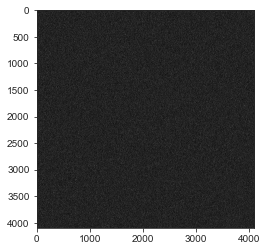

In [98]:
print(b[:,:,0].sum()*100/(x*y))
plt.imshow(b[:,:,0],cmap=plt.cm.gray)
plt.show()

In [1]:
from pymopt.voxel import VoxelWhiteNoiseModel
from scipy import stats
import numpy as np
import pandas as pa

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks", {'grid.linestyle': '--'})
import warnings

In [2]:
nPh = 50000

params = {
            'xy_size':[50,50],'voxel_space':0.2,'bv_tv':0.138,
            'th_dermis':1.2,'th_subcutaneus':2.8,'th_bone':50,
            'n_space':1.,'n_trabecular':1.4,'n_subcutaneus':1.4,'n_dermis':1.4,'n_air':1.,
            'ma_space':1e-8,'ma_trabecular':0.011,'ma_subcutaneus':0.011,'ma_dermis':0.037,
            'ms_space':1e-8,'ms_trabecular':20.536,'ms_subcutaneus':20,'ms_dermis':20,
            'g_space':0.90,'g_trabecular':0.90,'g_subcutaneus':0.90,'g_dermis':.90,
            }


model = VoxelWhiteNoiseModel(
    nPh = nPh,
    beam_angle = 45*np.pi/180,
    z_max_mode = True,
    initial_refrect_by_angle = False
)

In [3]:
model.build(**params)

Trabecular vBMD = 160.194876 [mg/cm^3]
Memory area size for voxel storage: 16.812 Mbyte


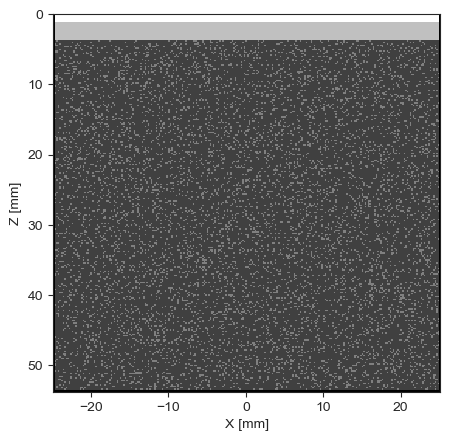

In [4]:
model.get_model_fig()

In [5]:
model.model.params

{'xy_size': [50, 50],
 'voxel_space': 0.2,
 'bv_tv': 0.138,
 'th_dermis': 1.2,
 'th_subcutaneus': 2.8,
 'th_bone': 50,
 'n_space': 1.0,
 'n_trabecular': 1.4,
 'n_subcutaneus': 1.4,
 'n_dermis': 1.4,
 'n_air': 1.0,
 'ma_space': 1e-08,
 'ma_trabecular': 0.011,
 'ma_subcutaneus': 0.011,
 'ma_dermis': 0.037,
 'ms_space': 1e-08,
 'ms_trabecular': 20.536,
 'ms_subcutaneus': 20,
 'ms_dermis': 20,
 'g_space': 0.9,
 'g_trabecular': 0.9,
 'g_subcutaneus': 0.9,
 'g_dermis': 0.9}

In [6]:
model.start()


###### Start ######

Progress: 0.294 [％]
Calculation time: 0 minutes 0.076 seconds.

Progress: 1.068 [％]
Calculation time: 0 minutes 0.149 seconds.

Progress: 3.026 [％]
Calculation time: 0 minutes 0.299 seconds.

Progress: 7.566 [％]
Calculation time: 0 minutes 0.574 seconds.

Progress: 16.004 [％]
Calculation time: 0 minutes 1.129 seconds.

Progress: 28.26 [％]
Calculation time: 0 minutes 2.083 seconds.

Progress: 41.614 [％]
Calculation time: 0 minutes 3.839 seconds.

Progress: 53.508 [％]
Calculation time: 0 minutes 7.745 seconds.

Progress: 64.554 [％]
Calculation time: 0 minutes 15.734 seconds.

Progress: 75.676 [％]
Calculation time: 0 minutes 29.681 seconds.

Progress: 87.622 [％]
Calculation time: 0 minutes 51.840 seconds.

Progress: 96.954 [％]
Calculation time: 1 minutes 21.988 seconds.

Progress: 99.762 [％]
Calculation time: 1 minutes 55.333 seconds.

Progress: 99.99 [％]
Calculation time: 2 minutes 22.633 seconds.


###### Finish ######
Maximum step number: 20381
######
Mean Rd 0.64

In [7]:
save_path = '../result/210706_whiteNoiseModelTest_nPh5e4_intra'
model.save_result(save_path,coment='test')

Monte Carlo results saved in 
-> ../result/210706_whiteNoiseModelTest_nPh5e4_intra_LID.pkl.bz2

Calculation conditions are saved in
-> ../result/210706_whiteNoiseModelTest_nPh5e4_intra_info.json

Calculation time: 0 minutes 0.218 seconds.


In [8]:
def radialDistance(p,w,nn,dr,nPh):
    alpha = np.array([(i)*dr for i in range(nn+1)])
    da = np.array([2*np.pi*(i+0.5)*dr**2 for i in range(nn)])
    r = np.sqrt(p[0]**2+p[1]**2)
    Rdr = []
    for i in range(nn):
        index = np.where((alpha[i]<r)&(alpha[i+1]>=r))[0]
        Rdr.append(w[index].sum())
    Rdr = np.array(Rdr)/(da*nPh)
    return alpha[:-1],Rdr

def AngularyResolved(v,w,nn,nPh):
    da = np.pi/(2*nn)
    alpha = np.array([(i+0.5)*da for i in range(nn+1)])
    alpha2 = np.array([(i)*da for i in range(nn+1)])
    do = 4*np.pi*np.sin(alpha)*np.sin(da/2)
    at = np.arccos(np.sign(v[2])*(v[2]))
    Rda = []
    for i in range(nn):
        index = np.where((alpha2[i]<at)&(alpha2[i+1]>=at))[0]
        Rda.append(w[index].sum())
    Rda = np.array(Rda)/(do[:-1]*nPh)
    return alpha[:-1],Rda

res = model.get_result()

In [14]:
nn = 50
dr = 20/nn
Rd_index = np.where(res['v'][2]<0)[0]
alpha,Rdr = radialDistance(res['p'][:,Rd_index],res['w'][Rd_index],nn,dr,res['nPh'])
alpha,Rda = AngularyResolved(res['v'][:,Rd_index],res['w'][Rd_index],nn,nPh)

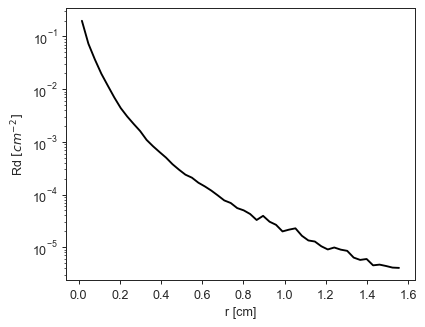

In [19]:
plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha,Rdr,'-',c = 'k')
plt.yscale('log')
plt.xlabel('r [cm]')
plt.ylabel('Rd $[cm^{-2}]$')
plt.show()

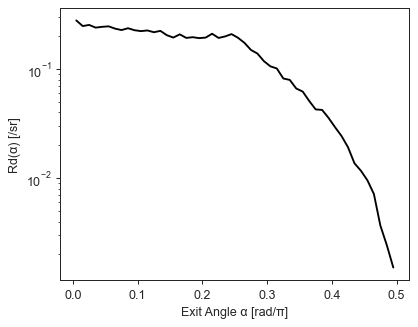

In [18]:
plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha/np.pi,Rda,c = 'k')
plt.xlabel('Exit Angle α [rad/π]')
plt.ylabel('Rd(α) [/sr]')
plt.yscale('log')
plt.show()